In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [36]:
data = pd.read_csv("data/mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#### Missing value

In [38]:
def introduce_missing_values(data, percentage=10):
    result = data.copy()
    for column in result.columns[1:]:
        n_missing = int(len(result[column]) * percentage / 100)
        missing_indices = np.random.choice(result.index, n_missing, replace=False)
        result.loc[missing_indices, column] = np.nan
    return result

In [39]:
# percent of missing value
percent = 20
data_with_missing = introduce_missing_values(data, percent)
data_with_missing.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,NaN,...,s,w,w,p,w,o,p,k,s,u
1,e,x,NaN,y,t,a,f,c,b,NaN,...,NaN,w,NaN,NaN,w,o,p,n,NaN,NaN
2,e,b,s,w,t,l,f,c,b,NaN,...,s,w,w,p,NaN,o,p,NaN,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,NaN
4,e,x,s,NaN,NaN,n,f,w,b,NaN,...,NaN,w,w,p,NaN,o,e,n,NaN,NaN


In [40]:
# data is categorical, need to use mode imputation instead of mean
label_encoders = {}
for column in data_with_missing.columns:
    encoder = LabelEncoder()
    data_with_missing[column] = encoder.fit_transform(data_with_missing[column].astype(str))
    label_encoders[column] = encoder

# Original Data
encoded_data = data.apply(LabelEncoder().fit_transform)

# Mode imputation
mode_imputer = SimpleImputer(strategy='most_frequent')
data_mode_imputed = pd.DataFrame(mode_imputer.fit_transform(data_with_missing), columns=data_with_missing.columns)

# KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
data_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(data_with_missing), columns=data_with_missing.columns)

data_mode_imputed.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,6,3,4,2,7,1,0,1,6,...,3,8,8,1,3,2,5,2,4,6
1,0,6,2,10,2,0,1,0,0,6,...,2,8,5,0,3,2,5,3,3,4
2,0,0,3,9,2,3,1,0,0,6,...,3,8,8,1,1,2,5,4,2,3
3,1,6,4,9,2,7,1,0,1,5,...,3,8,8,1,3,2,5,2,4,4
4,0,6,3,5,1,5,1,2,0,6,...,2,8,8,1,1,2,0,3,3,4


In [41]:
data_knn_imputed.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,6.0,3.0,4.0,2.0,7.0,1.0,0.0,1.0,6.0,...,3.0,8.0,8.0,1.0,3.0,2.0,5.0,2.0,4.0,6.0
1,0.0,6.0,2.0,10.0,2.0,0.0,1.0,0.0,0.0,6.0,...,2.0,8.0,5.0,0.0,3.0,2.0,5.0,3.0,3.0,4.0
2,0.0,0.0,3.0,9.0,2.0,3.0,1.0,0.0,0.0,6.0,...,3.0,8.0,8.0,1.0,1.0,2.0,5.0,4.0,2.0,3.0
3,1.0,6.0,4.0,9.0,2.0,7.0,1.0,0.0,1.0,5.0,...,3.0,8.0,8.0,1.0,3.0,2.0,5.0,2.0,4.0,4.0
4,0.0,6.0,3.0,5.0,1.0,5.0,1.0,2.0,0.0,6.0,...,2.0,8.0,8.0,1.0,1.0,2.0,0.0,3.0,3.0,4.0


In [42]:
encoded_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


### Data Visualization

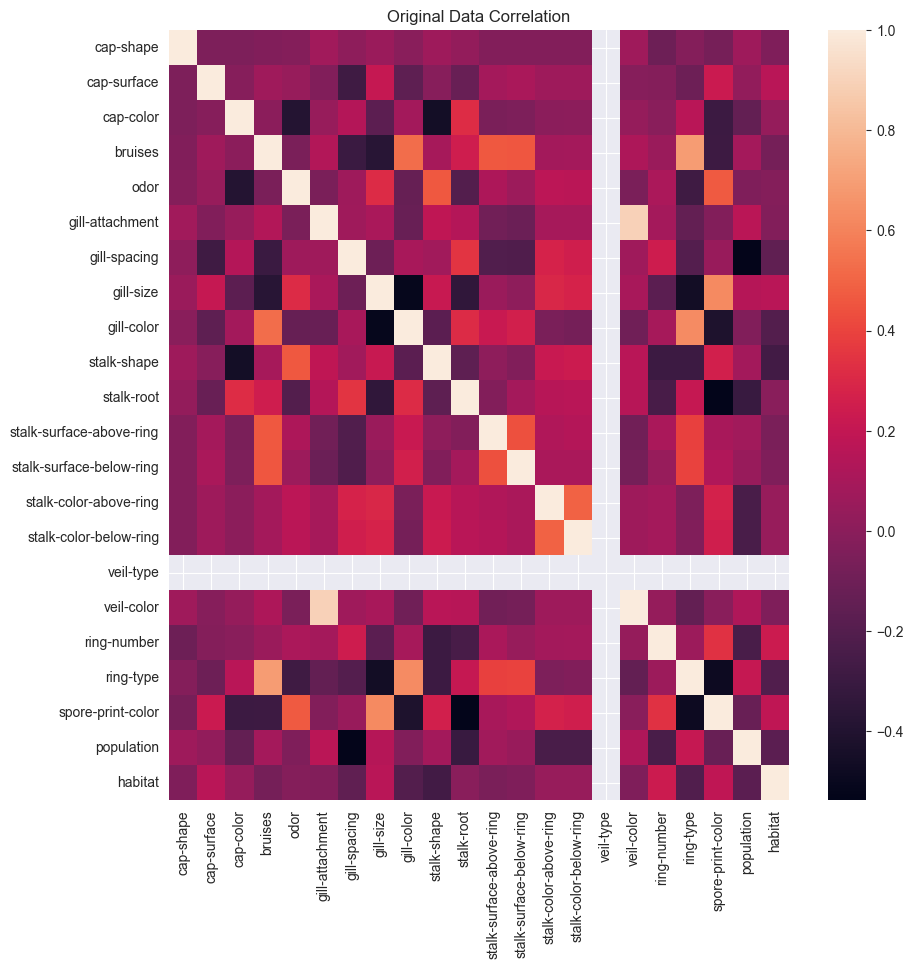

In [43]:
original_corr = encoded_data.drop('class',axis=1).corr()
plt.figure(figsize=(10, 10))
sns.heatmap(original_corr)
plt.title("Original Data Correlation")
plt.show()

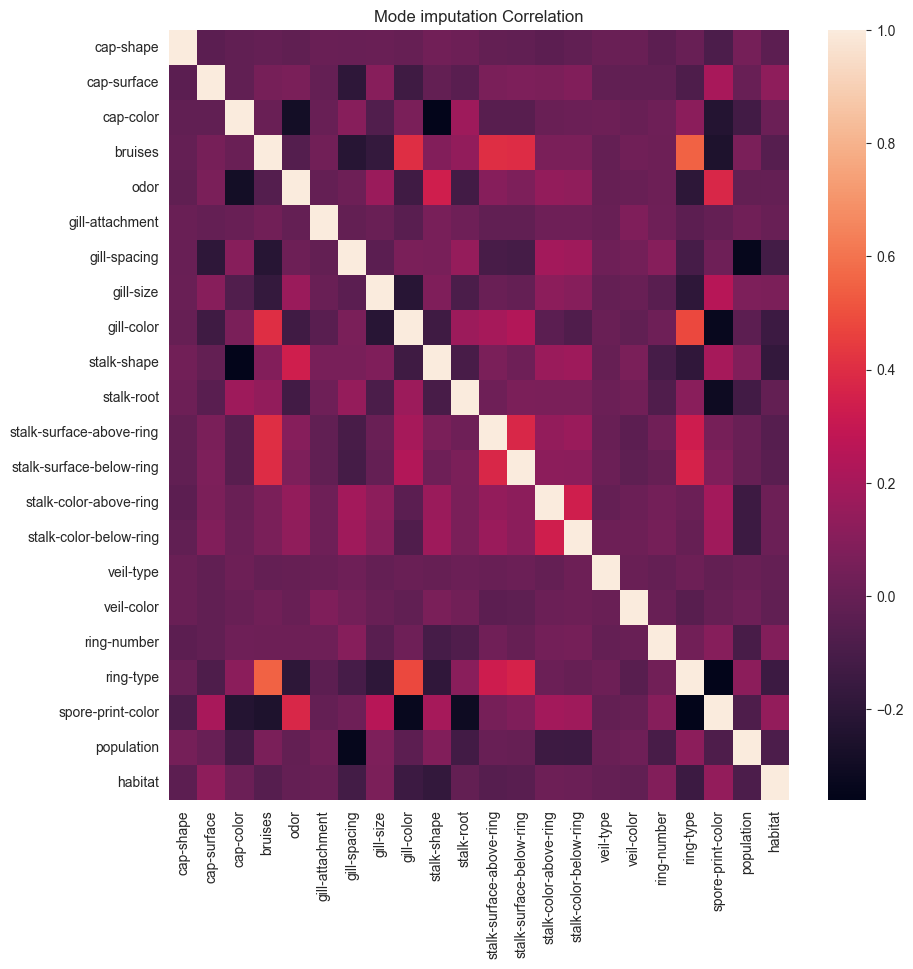

In [44]:
mode_corr = data_mode_imputed.drop('class',axis=1).corr()
plt.figure(figsize=(10, 10))
sns.heatmap(mode_corr)
plt.title("Mode imputation Correlation")
plt.show()

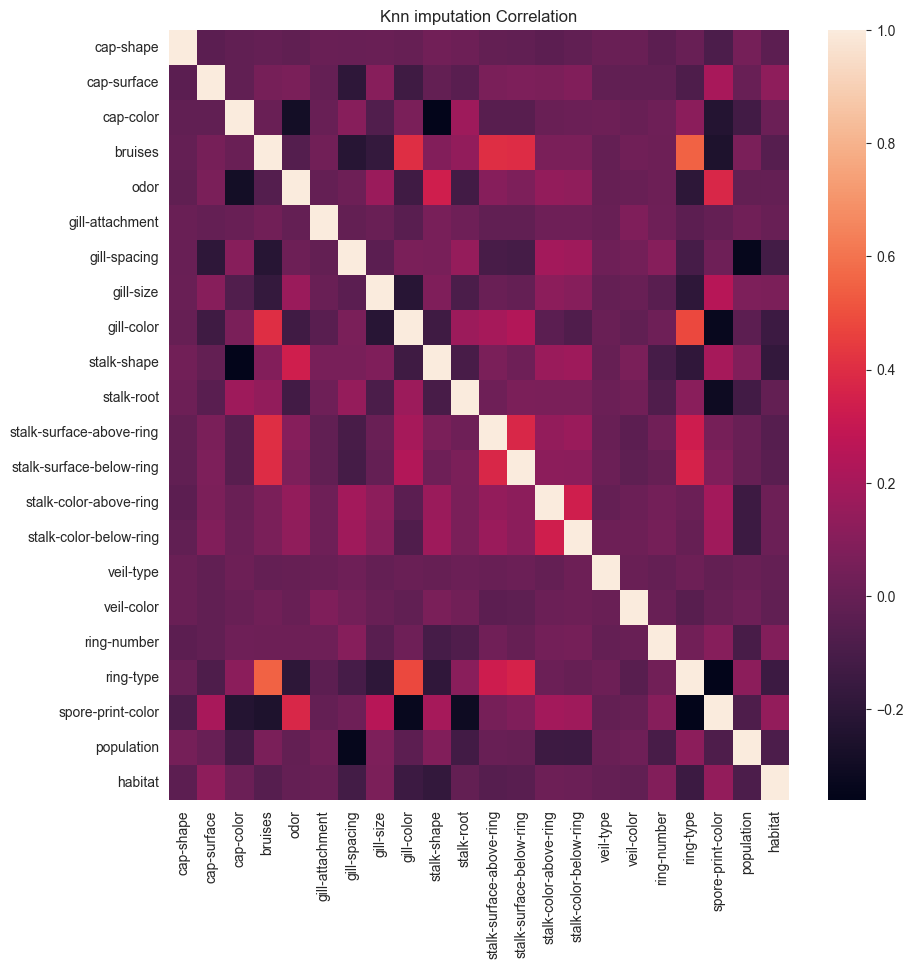

In [45]:
knn_corr = data_knn_imputed.drop('class',axis=1).corr()
plt.figure(figsize=(10, 10))
sns.heatmap(knn_corr)
plt.title("Knn imputation Correlation")
plt.show()

In [46]:
from sklearn.ensemble import RandomForestClassifier

def feature_importance(data):
    X = data.drop('class', axis=1)
    y = data['class']
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
    random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
    random_forest.fit(x_train, y_train)
    
    importances = random_forest.feature_importances_
    
    feature_importance = pd.DataFrame(data={'class':X.columns,'importance':importances}).sort_values('importance', ascending=False)
    return feature_importance, importances, X


In [47]:
def pie_chart(title, temp_data, temp_x):
    fig, ax = plt.subplots(figsize=(14, 15))  
    wedges, texts, autotexts = ax.pie(
        temp_data, labels=temp_x.columns, autopct='%1.1f%%',
        startangle=140, textprops={'fontsize': 8} 
    )
    
    ax.set_position([0.1, 0.1, 0.75, 0.8])
    plt.legend(wedges, temp_x.columns, title="Features", loc="center left", fontsize='small', bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.title(title+' Feature Importance in Random Forest Model')
    plt.axis('equal')
    plt.show()


In [48]:
original_data_feature_importance, original_data_importances, original_data_imputed_X = feature_importance(encoded_data)
original_data_feature_importance

,class,importance
4,odor,0.176417
7,gill-size,0.107970
19,spore-print-color,0.106933
8,gill-color,0.104761
18,ring-type,0.066546
10,stalk-root,0.064476
20,population,0.060369
11,stalk-surface-above-ring,0.054747
3,bruises,0.048076
12,stalk-surface-below-ring,0.035075


In [49]:
data_mode_feature_importance, data_mode_importances, data_mode_imputed_X = feature_importance(data_mode_imputed)
data_mode_feature_importance


,class,importance
4,odor,0.196528
8,gill-color,0.126615
19,spore-print-color,0.090467
7,gill-size,0.072675
18,ring-type,0.065616
11,stalk-surface-above-ring,0.051835
6,gill-spacing,0.051118
20,population,0.049701
12,stalk-surface-below-ring,0.045957
10,stalk-root,0.045880


In [50]:
data_knn_feature_importance, data_knn_importance, data_knn_imputed_X = feature_importance(data_knn_imputed)
data_knn_feature_importance

,class,importance
4,odor,0.196528
8,gill-color,0.126615
19,spore-print-color,0.090467
7,gill-size,0.072675
18,ring-type,0.065616
11,stalk-surface-above-ring,0.051835
6,gill-spacing,0.051118
20,population,0.049701
12,stalk-surface-below-ring,0.045957
10,stalk-root,0.045880


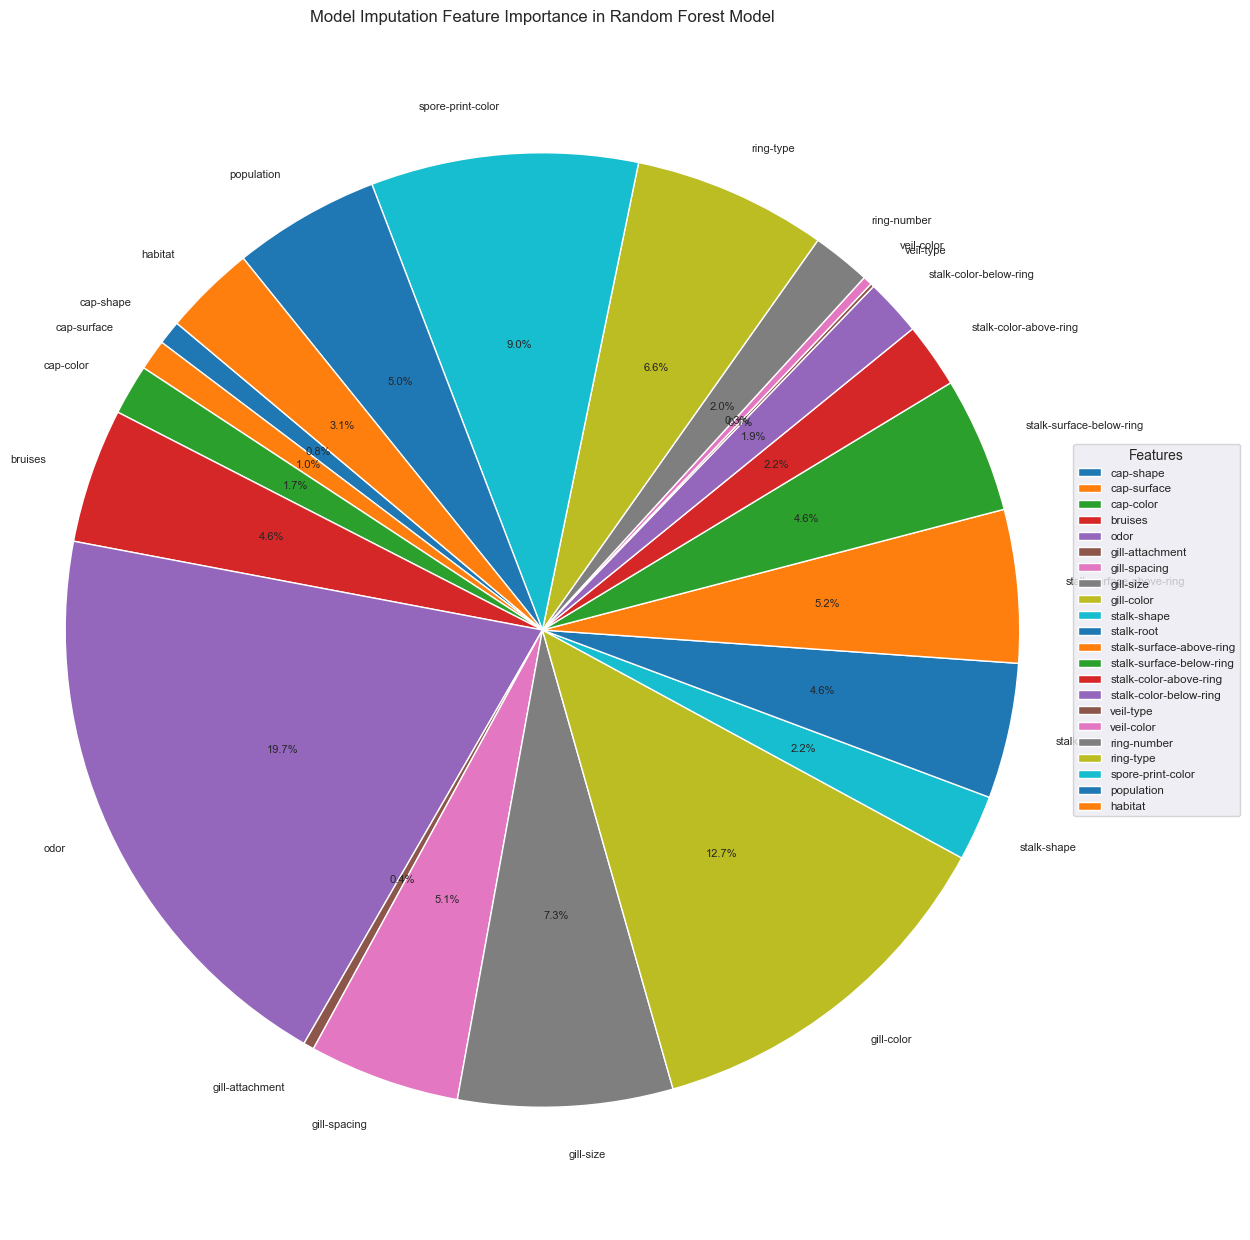

In [51]:
pie_chart("Model Imputation",data_knn_importance, data_mode_imputed_X)

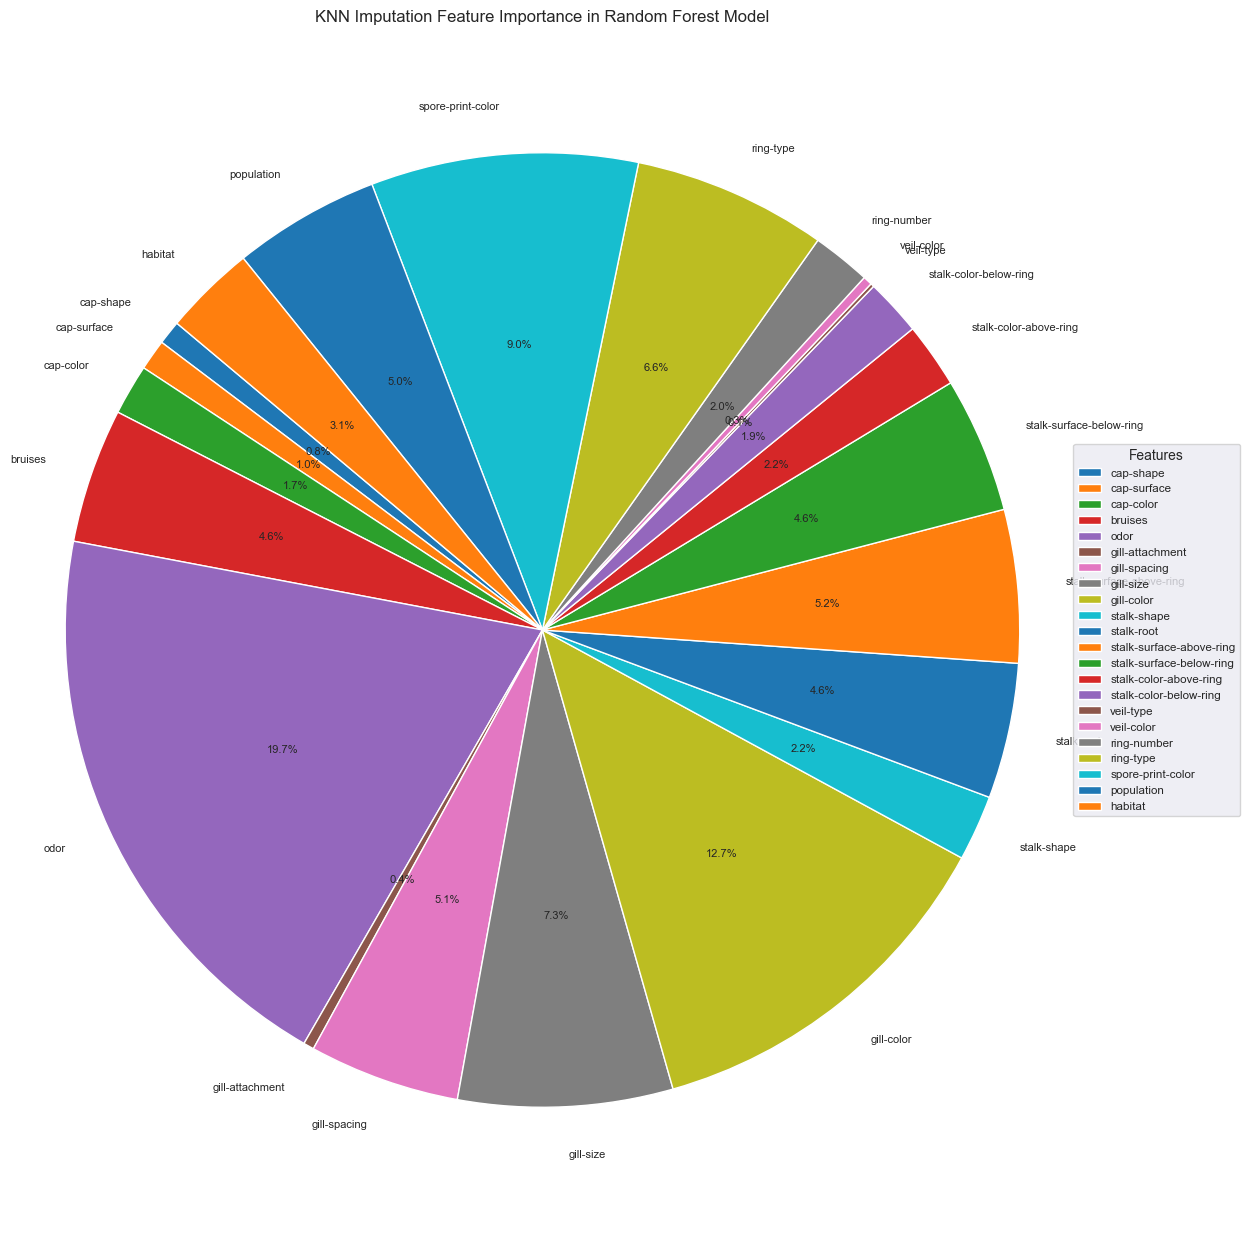

In [52]:
pie_chart("KNN Imputation",data_knn_importance, data_mode_imputed_X)

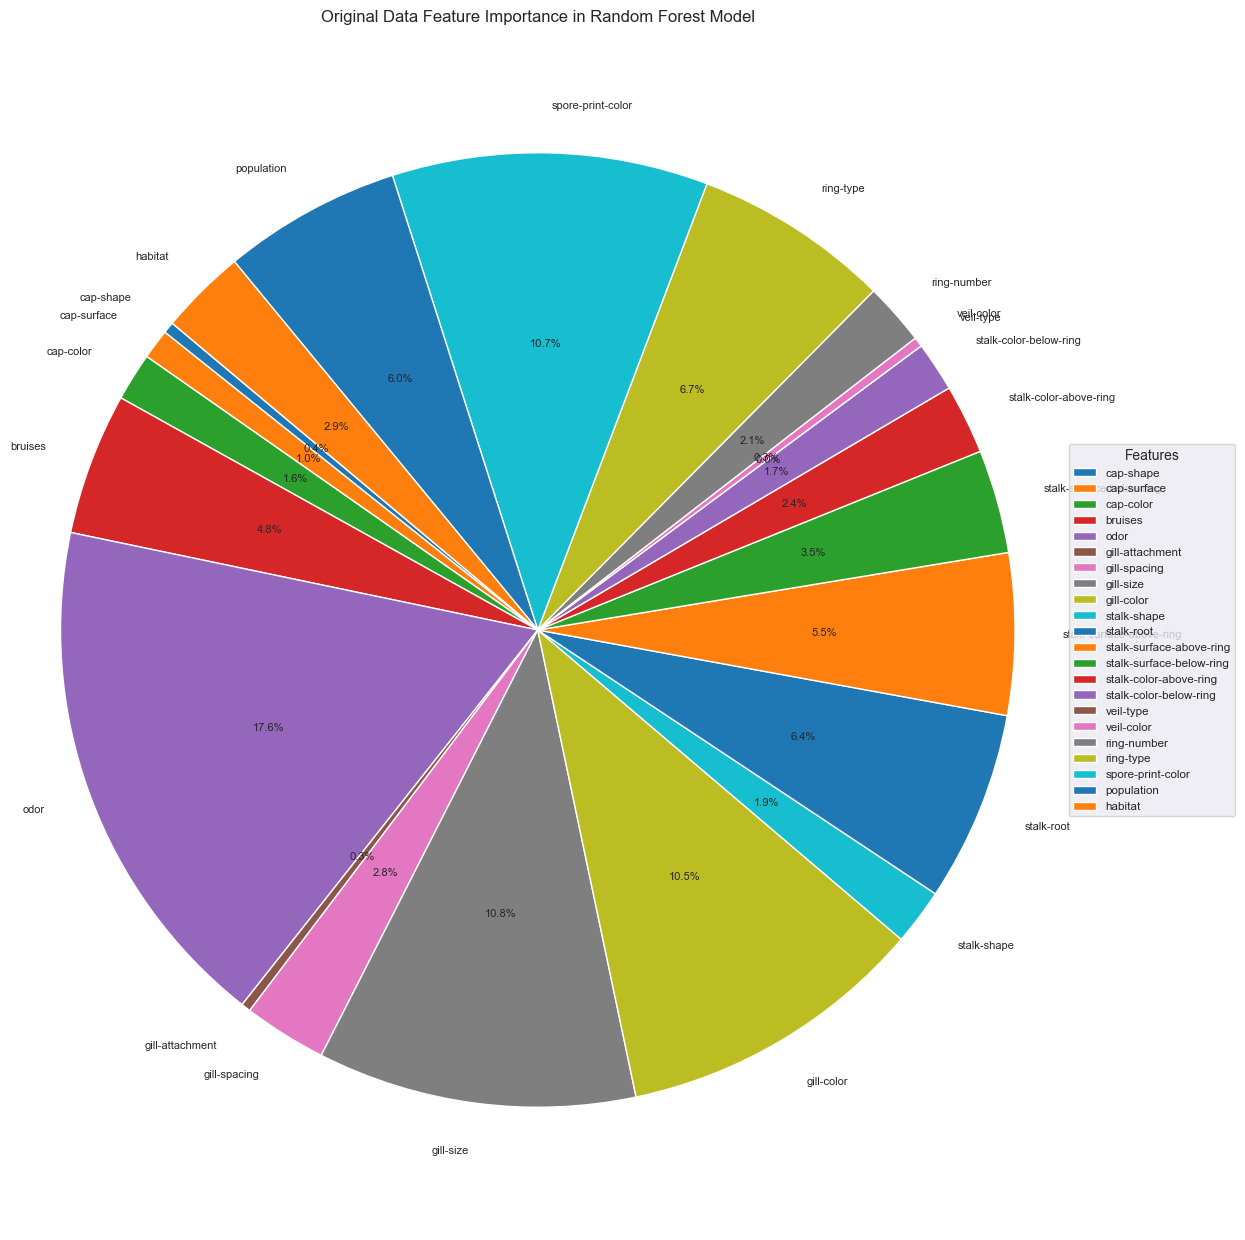

In [53]:
pie_chart("Original Data",original_data_importances, original_data_imputed_X)

In [54]:
check = np.isclose(data_mode_imputed.to_numpy(), data_knn_imputed.to_numpy(), rtol=1e-05, atol=1e-08).all()

check

True

# Training

## Models

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

X_original = encoded_data.drop('class', axis=1)
y_original = encoded_data['class']
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

X_mode = data_mode_imputed.drop('class', axis=1)
y_mode = data_mode_imputed['class']
X_train_mode, X_test_mode, y_train_mode, y_test_mode = train_test_split(X_mode, y_mode, test_size=0.2, random_state=42)

X_knn = data_knn_imputed.drop('class', axis=1)
y_knn = data_knn_imputed['class']
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)


def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

print("X_train_orig flags:", X_train_orig.flags)
print("X_test_orig flags:", X_test_orig.flags)

X_train_orig = X_train_orig.to_numpy()
X_test_orig = X_test_orig.to_numpy()

X_train_mode = X_train_mode.to_numpy()
X_test_mode = X_test_mode.to_numpy()

X_train_knn = X_train_knn.to_numpy()
X_test_knn = X_test_knn.to_numpy()

X_train_orig flags: <Flags(allows_duplicate_labels=True)>
X_test_orig flags: <Flags(allows_duplicate_labels=True)>


In [56]:
lr_model = LogisticRegression(max_iter=1000)
svm_model = SVC(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)

accuracy_lr = train_and_evaluate_model(lr_model, X_train_orig, y_train_orig, X_test_orig, y_test_orig)
accuracy_svm = train_and_evaluate_model(svm_model, X_train_orig, y_train_orig, X_test_orig, y_test_orig)
accuracy_gb = train_and_evaluate_model(gb_model, X_train_orig, y_train_orig, X_test_orig, y_test_orig)
accuracy_rf = train_and_evaluate_model(rf_model, X_train_orig, y_train_orig, X_test_orig, y_test_orig)
accuracy_nb = train_and_evaluate_model(nb_model, X_train_orig, y_train_orig, X_test_orig, y_test_orig)
accuracy_dt = train_and_evaluate_model(dt_model, X_train_orig, y_train_orig, X_test_orig, y_test_orig)
accuracy_knn = train_and_evaluate_model(knn_model, X_train_orig, y_train_orig, X_test_orig, y_test_orig)

accuracy_lr_mode = train_and_evaluate_model(lr_model, X_train_mode, y_train_mode, X_test_mode, y_test_mode)
accuracy_svm_mode = train_and_evaluate_model(svm_model, X_train_mode, y_train_mode, X_test_mode, y_test_mode)
accuracy_gb_mode = train_and_evaluate_model(gb_model, X_train_mode, y_train_mode, X_test_mode, y_test_mode)
accuracy_rf_mode = train_and_evaluate_model(rf_model, X_train_mode, y_train_mode, X_test_mode, y_test_mode)
accuracy_nb_mode = train_and_evaluate_model(nb_model, X_train_mode, y_train_mode, X_test_mode, y_test_mode)
accuracy_dt_mode = train_and_evaluate_model(dt_model, X_train_mode, y_train_mode, X_test_mode, y_test_mode)
accuracy_knn_mode = train_and_evaluate_model(knn_model, X_train_mode, y_train_mode, X_test_mode, y_test_mode)

accuracy_lr_knn = train_and_evaluate_model(lr_model, X_train_knn, y_train_knn, X_test_knn, y_test_knn)
accuracy_svm_knn = train_and_evaluate_model(svm_model, X_train_knn, y_train_knn, X_test_knn, y_test_knn)
accuracy_gb_knn = train_and_evaluate_model(gb_model, X_train_knn, y_train_knn, X_test_knn, y_test_knn)
accuracy_rf_knn = train_and_evaluate_model(rf_model, X_train_knn, y_train_knn, X_test_knn, y_test_knn)
accuracy_nb_knn = train_and_evaluate_model(nb_model, X_train_knn, y_train_knn, X_test_knn, y_test_knn)
accuracy_dt_knn = train_and_evaluate_model(dt_model, X_train_knn, y_train_knn, X_test_knn, y_test_knn)
accuracy_knn_mode_knn = train_and_evaluate_model(knn_model, X_train_knn, y_train_knn, X_test_knn, y_test_knn)


results = {
    "LogisticRegression": accuracy_lr,
    "LogisticRegression Mode Imputed": accuracy_lr_mode,
    "LogisticRegression KNN Imputed": accuracy_lr_knn,
    
    "SVM": accuracy_svm,
    "SVM Mode Imputed": accuracy_svm_mode,
    "SVM KNN Imputed": accuracy_svm_knn,
    
    "GradientBoosting": accuracy_gb,
    "GradientBoosting Mode_Imputed": accuracy_gb_mode,
    "GradientBoosting KNN Imputed": accuracy_gb_knn,
    
    "RandomForest": accuracy_rf,
    "RandomForest Mode Imputed": accuracy_rf_mode,
    "RandomForest KNN Imputed": accuracy_rf_knn,
    
    "NaiveBayes": accuracy_nb,
    "NaiveBayes Mode Imputed": accuracy_nb_mode,
    "NaiveBayes KNN Imputed": accuracy_nb_knn,
    
    "DecisionTree": accuracy_dt,
    "DecisionTree Mode Imputed": accuracy_dt_mode,
    "DecisionTree KNN Imputed": accuracy_dt_knn,
    
    "K-Nearest Neighbors": accuracy_knn,
    "K-Nearest Neighbors Mode Imputed": accuracy_knn_mode,
    "K-Nearest Neighbors KNN Imputed": accuracy_knn_mode_knn,

}
results

{'LogisticRegression': 0.9476923076923077,
 'LogisticRegression Mode Imputed': 0.8615384615384616,
 'LogisticRegression KNN Imputed': 0.8615384615384616,
 'SVM': 0.9926153846153846,
 'SVM Mode Imputed': 0.96,
 'SVM KNN Imputed': 0.96,
 'GradientBoosting': 1.0,
 'GradientBoosting Mode_Imputed': 0.9907692307692307,
 'GradientBoosting KNN Imputed': 0.9907692307692307,
 'RandomForest': 1.0,
 'RandomForest Mode Imputed': 0.9987692307692307,
 'RandomForest KNN Imputed': 0.9987692307692307,
 'NaiveBayes': 0.9218461538461539,
 'NaiveBayes Mode Imputed': 0.88,
 'NaiveBayes KNN Imputed': 0.88,
 'DecisionTree': 1.0,
 'DecisionTree Mode Imputed': 0.9876923076923076,
 'DecisionTree KNN Imputed': 0.9876923076923076,
 'K-Nearest Neighbors': 0.9963076923076923,
 'K-Nearest Neighbors Mode Imputed': 0.9624615384615385,
 'K-Nearest Neighbors KNN Imputed': 0.9624615384615385}

In [57]:
from sklearn.metrics import confusion_matrix
    
def train_and_get_cm(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return confusion_matrix(y_test, y_pred)

models = {
    "LogisticRegression": lr_model,
    "SVM": svm_model,
    "GradientBoosting": gb_model,
    "RandomForest": rf_model,
    "NaiveBayes": nb_model,
    "DecisionTree": dt_model,
    "K-Nearest Neighbors": knn_model
}

datasets = {
    "Original": (X_train_orig, y_train_orig, X_test_orig, y_test_orig),
    "Mode_Imputed": (X_train_mode, y_train_mode, X_test_mode, y_test_mode),
    "KNN_Imputed": (X_train_knn, y_train_knn, X_test_knn, y_test_knn)
}

for model_name, model in models.items():
    for dataset_name, (X_train, y_train, X_test, y_test) in datasets.items():
        cm = train_and_get_cm(model, X_train, y_train, X_test, y_test)
        print(f"{model_name} - {dataset_name} ")
        print(cm)
        print('\n')


LogisticRegression - Original 
[[799  44]
 [ 41 741]]


LogisticRegression - Mode_Imputed 
[[749  94]
 [131 651]]


LogisticRegression - KNN_Imputed 
[[749  94]
 [131 651]]

SVM - Original 
[[842   1]
 [ 11 771]]

SVM - Mode_Imputed 
[[826  17]
 [ 48 734]]

SVM - KNN_Imputed 
[[826  17]
 [ 48 734]]

GradientBoosting - Original 
[[843   0]
 [  0 782]]

GradientBoosting - Mode_Imputed 
[[836   7]
 [  8 774]]

GradientBoosting - KNN_Imputed 
[[836   7]
 [  8 774]]


RandomForest - Original 
[[843   0]
 [  0 782]]

RandomForest - Mode_Imputed 
[[843   0]
 [  2 780]]

RandomForest - KNN_Imputed 
[[843   0]
 [  2 780]]


NaiveBayes - Original 
[[771  72]
 [ 55 727]]


NaiveBayes - Mode_Imputed 
[[797  46]
 [149 633]]


NaiveBayes - KNN_Imputed 
[[797  46]
 [149 633]]


DecisionTree - Original 
[[843   0]
 [  0 782]]


DecisionTree - Mode_Imputed 
[[831  12]
 [  8 774]]


DecisionTree - KNN_Imputed 
[[831  12]
 [  8 774]]


K-Nearest Neighbors - Original 
[[837   6]
 [  0 782]]

K-Nearest Nei

In [58]:
from sklearn.ensemble import VotingClassifier
models = [
    ('lr', lr_model),
    ('svm', svm_model),
    ('gb', gb_model),
    ('rf', rf_model),
    ('nb', nb_model),
    ('dt', dt_model),
    ('knn', knn_model)
]

def combine_classifiers(combine_models, temp_x_train, temp_y_train, temp_x_test, temp_y_test):
    voting_clf = VotingClassifier(estimators=combine_models, voting='hard')
    voting_clf.fit(temp_x_train, temp_y_train)
    temp_pre = voting_clf.predict(temp_x_test)
    temp_cm = confusion_matrix(temp_y_test, temp_pre)
    accuracy_voting = voting_clf.score(temp_x_test, temp_y_test)
    return accuracy_voting, temp_cm


original_data_accuracy, combined_cm_original_data = combine_classifiers(models, X_train_orig, y_train_orig, X_test_orig, y_test_orig)
mode_imputed_data_accuracy, combined_cm_mode_imputed_data = combine_classifiers(models, X_train_mode, y_train_mode, X_test_mode, y_test_mode)
knn_imputed_data_accuracy, combined_cm_knn_imputed_data = combine_classifiers(models, X_train_knn, y_train_knn, X_test_knn, y_test_knn)


In [59]:
print("Original Data: \n", original_data_accuracy, combined_cm_original_data)
print("Mode Imputed Data: \n", mode_imputed_data_accuracy, combined_cm_mode_imputed_data)
print("KNN Imputed Data: \n", knn_imputed_data_accuracy, combined_cm_knn_imputed_data)


Original Data: 
 1.0 [[843   0]
 [  0 782]]
Mode Imputed Data: 
 0.9870769230769231 [[840   3]
 [ 18 764]]
KNN Imputed Data: 
 0.9870769230769231 [[840   3]
 [ 18 764]]


### Neural Network

In [60]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchsummary import summary

In [61]:
def prepare_data(X, y):
    X = torch.tensor(X.values, dtype=torch.float32)
    y = torch.tensor(y.values, dtype=torch.long)
    return train_test_split(X, y, test_size=0.3, random_state=42)

class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

In [62]:
def train_model(X_train, y_train, X_test, y_test):
    input_size = X_train.shape[1]
    num_classes = len(torch.unique(y_train))
    model = NeuralNet(input_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters())

    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)

    train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)

    num_epochs = 50
    history = {'loss': [], 'accuracy': []}
    for epoch in range(num_epochs):
        total_loss = 0
        correct = 0
        total = 0
        for features, labels in train_loader:
            outputs = model(features)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        epoch_loss = total_loss / len(train_loader)
        epoch_accuracy = 100 * correct / total
        history['loss'].append(epoch_loss)
        history['accuracy'].append(epoch_accuracy)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

    return model, history


def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        _, predicted = torch.max(outputs.data, 1)
        total = y_test.size(0)
        correct = (predicted == y_test).sum().item()
        accuracy = 100 * correct / total
        print(f'Accuracy of the model on the test set: {accuracy:.2f}%')
    return accuracy

def plot_training_history(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Loss')
    plt.title(title+' Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label='Accuracy')
    plt.title(title+' Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()



In [63]:
print('NETWORK SUMMARY:')
model = NeuralNet(22, 2)
print(summary(model, (22,)))

NETWORK SUMMARY:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]           1,472
              ReLU-2                   [-1, 64]               0
            Linear-3                   [-1, 32]           2,080
              ReLU-4                   [-1, 32]               0
            Linear-5                    [-1, 2]              66
Total params: 3,618
Trainable params: 3,618
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.02
----------------------------------------------------------------
None


Epoch [1/50], Loss: 0.3382, Accuracy: 86.48%
Epoch [2/50], Loss: 0.1214, Accuracy: 95.50%
Epoch [3/50], Loss: 0.0635, Accuracy: 97.87%
Epoch [4/50], Loss: 0.0305, Accuracy: 99.07%
Epoch [5/50], Loss: 0.0166, Accuracy: 99.63%
Epoch [6/50], Loss: 0.0098, Accuracy: 99.88%
Epoch [7/50], Loss: 0.0066, Accuracy: 99.89%
Epoch [8/50], Loss: 0.0048, Accuracy: 99.95%
Epoch [9/50], Loss: 0.0030, Accuracy: 99.98%
Epoch [10/50], Loss: 0.0025, Accuracy: 100.00%
Epoch [11/50], Loss: 0.0012, Accuracy: 100.00%
Epoch [12/50], Loss: 0.0011, Accuracy: 100.00%
Epoch [13/50], Loss: 0.0008, Accuracy: 100.00%
Epoch [14/50], Loss: 0.0007, Accuracy: 100.00%
Epoch [15/50], Loss: 0.0004, Accuracy: 100.00%
Epoch [16/50], Loss: 0.0004, Accuracy: 100.00%
Epoch [17/50], Loss: 0.0003, Accuracy: 100.00%
Epoch [18/50], Loss: 0.0003, Accuracy: 100.00%
Epoch [19/50], Loss: 0.0002, Accuracy: 100.00%
Epoch [20/50], Loss: 0.0002, Accuracy: 100.00%
Epoch [21/50], Loss: 0.0001, Accuracy: 100.00%
Epoch [22/50], Loss: 0.0001, Ac

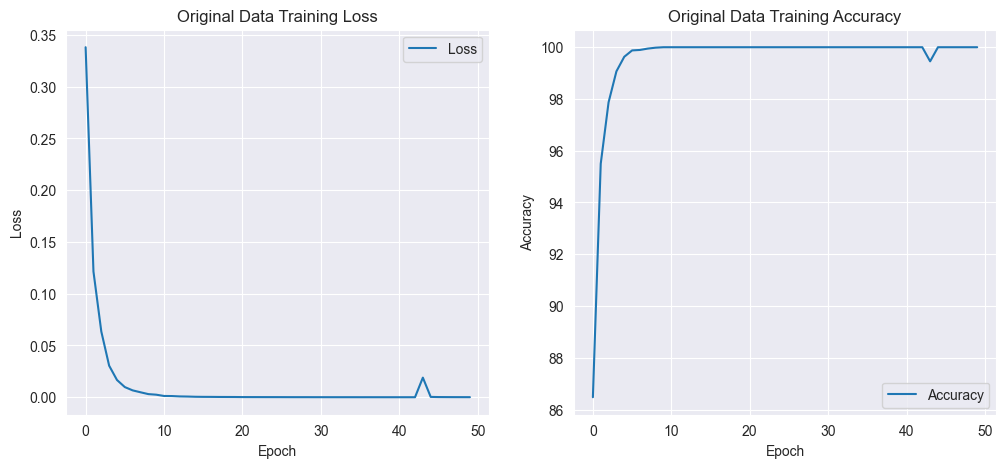

In [64]:
y = encoded_data['class']
X = encoded_data.drop(['class'], axis=1)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = prepare_data(X, y)
model_orig, history_orig = train_model(X_train_orig, y_train_orig, X_test_orig, y_test_orig)
accuracy_orig = evaluate_model(model_orig, X_test_orig, y_test_orig)
plot_training_history(history_orig, "Original Data")

Epoch [1/50], Loss: 0.4137, Accuracy: 80.30%
Epoch [2/50], Loss: 0.2654, Accuracy: 88.96%
Epoch [3/50], Loss: 0.2023, Accuracy: 91.95%
Epoch [4/50], Loss: 0.1650, Accuracy: 93.74%
Epoch [5/50], Loss: 0.1406, Accuracy: 94.74%
Epoch [6/50], Loss: 0.1247, Accuracy: 95.34%
Epoch [7/50], Loss: 0.1165, Accuracy: 95.73%
Epoch [8/50], Loss: 0.1046, Accuracy: 95.97%
Epoch [9/50], Loss: 0.0940, Accuracy: 96.45%
Epoch [10/50], Loss: 0.0902, Accuracy: 96.62%
Epoch [11/50], Loss: 0.0836, Accuracy: 96.85%
Epoch [12/50], Loss: 0.0746, Accuracy: 97.33%
Epoch [13/50], Loss: 0.0735, Accuracy: 97.20%
Epoch [14/50], Loss: 0.0679, Accuracy: 97.59%
Epoch [15/50], Loss: 0.0642, Accuracy: 97.61%
Epoch [16/50], Loss: 0.0588, Accuracy: 97.94%
Epoch [17/50], Loss: 0.0534, Accuracy: 98.03%
Epoch [18/50], Loss: 0.0519, Accuracy: 98.19%
Epoch [19/50], Loss: 0.0501, Accuracy: 98.17%
Epoch [20/50], Loss: 0.0465, Accuracy: 98.24%
Epoch [21/50], Loss: 0.0494, Accuracy: 98.00%
Epoch [22/50], Loss: 0.0421, Accuracy: 98.4

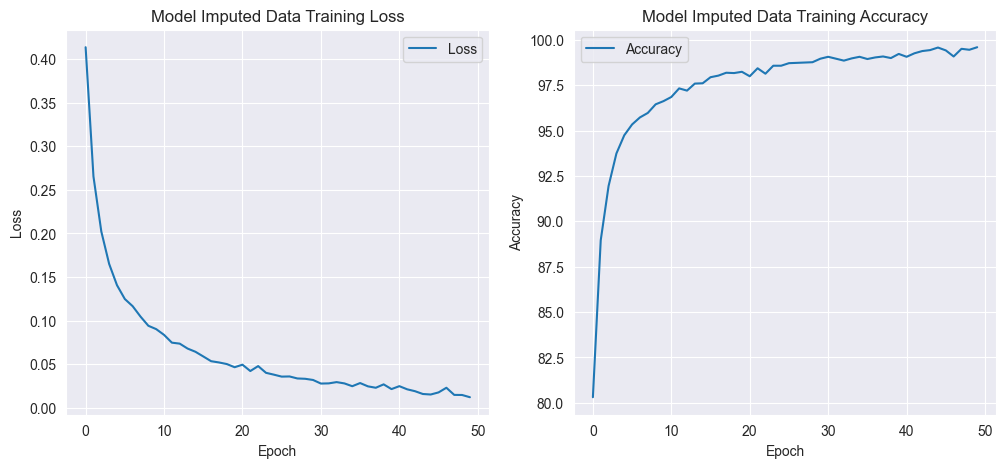

In [65]:
X = data_mode_imputed.drop(['class'], axis=1)
X_train_mode, X_test_mode, y_train_mode, y_test_mode = prepare_data(X, y)
model_mode, history_mode = train_model(X_train_mode, y_train_mode, X_test_mode, y_test_mode)
accuracy_mode = evaluate_model(model_mode, X_test_mode, y_test_mode)
plot_training_history(history_mode, "Model Imputed Data")

Epoch [1/50], Loss: 0.4091, Accuracy: 81.73%
Epoch [2/50], Loss: 0.2483, Accuracy: 89.55%
Epoch [3/50], Loss: 0.1947, Accuracy: 92.28%
Epoch [4/50], Loss: 0.1595, Accuracy: 93.44%
Epoch [5/50], Loss: 0.1391, Accuracy: 94.60%
Epoch [6/50], Loss: 0.1231, Accuracy: 95.20%
Epoch [7/50], Loss: 0.1121, Accuracy: 95.66%
Epoch [8/50], Loss: 0.0991, Accuracy: 96.31%
Epoch [9/50], Loss: 0.0945, Accuracy: 96.54%
Epoch [10/50], Loss: 0.0872, Accuracy: 96.94%
Epoch [11/50], Loss: 0.0746, Accuracy: 97.36%
Epoch [12/50], Loss: 0.0730, Accuracy: 97.43%
Epoch [13/50], Loss: 0.0706, Accuracy: 97.24%
Epoch [14/50], Loss: 0.0664, Accuracy: 97.61%
Epoch [15/50], Loss: 0.0651, Accuracy: 97.45%
Epoch [16/50], Loss: 0.0583, Accuracy: 97.82%
Epoch [17/50], Loss: 0.0513, Accuracy: 98.17%
Epoch [18/50], Loss: 0.0514, Accuracy: 98.31%
Epoch [19/50], Loss: 0.0473, Accuracy: 98.24%
Epoch [20/50], Loss: 0.0456, Accuracy: 98.45%
Epoch [21/50], Loss: 0.0469, Accuracy: 98.36%
Epoch [22/50], Loss: 0.0433, Accuracy: 98.4

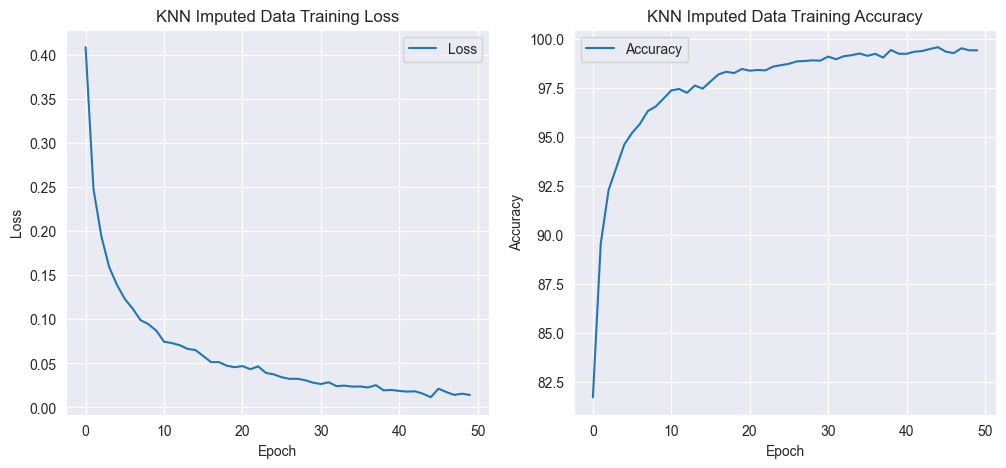

In [66]:
X = data_knn_imputed.drop(['class'], axis=1)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = prepare_data(X, y)
model_knn, history_knn = train_model(X_train_knn, y_train_knn, X_test_knn, y_test_knn)
accuracy_knn = evaluate_model(model_knn, X_test_knn, y_test_knn)
plot_training_history(history_knn, "KNN Imputed Data")